First few rows of the dataset:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1  

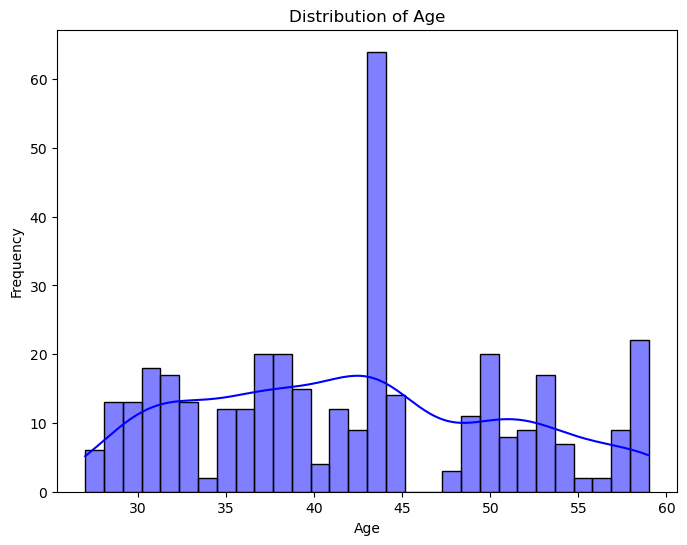

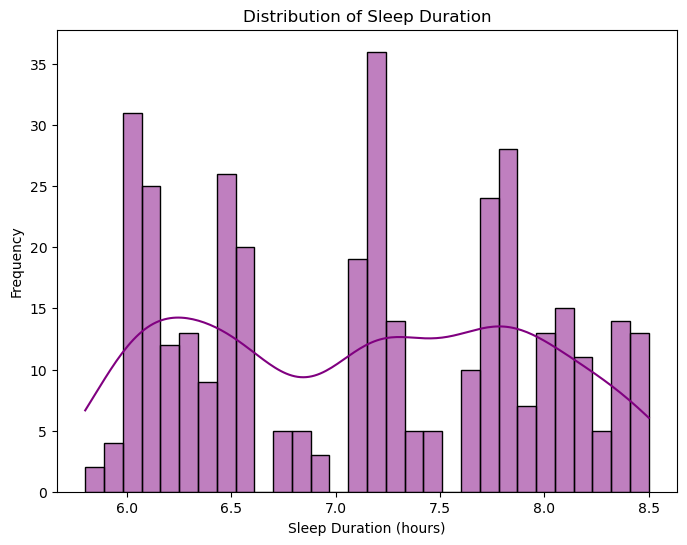

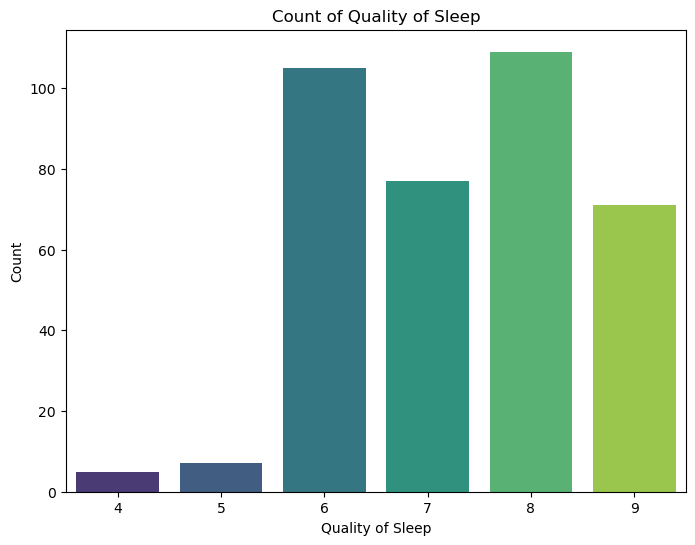

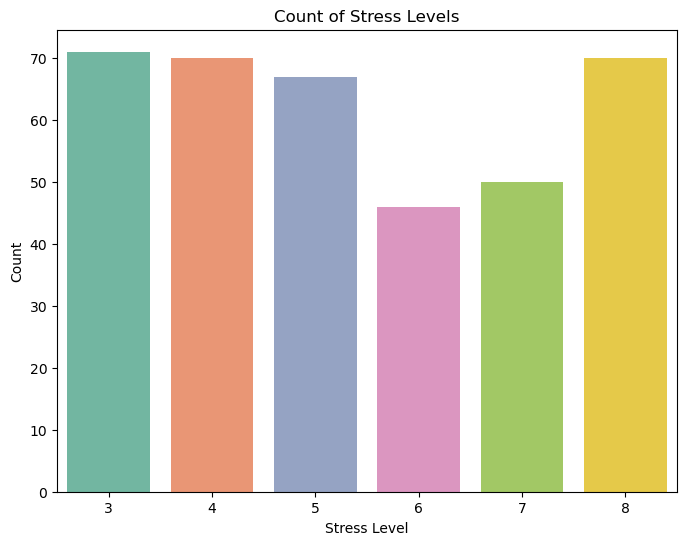

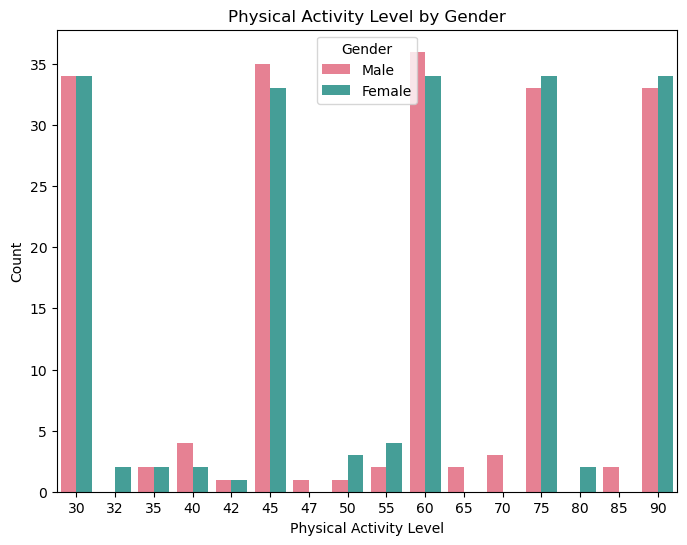

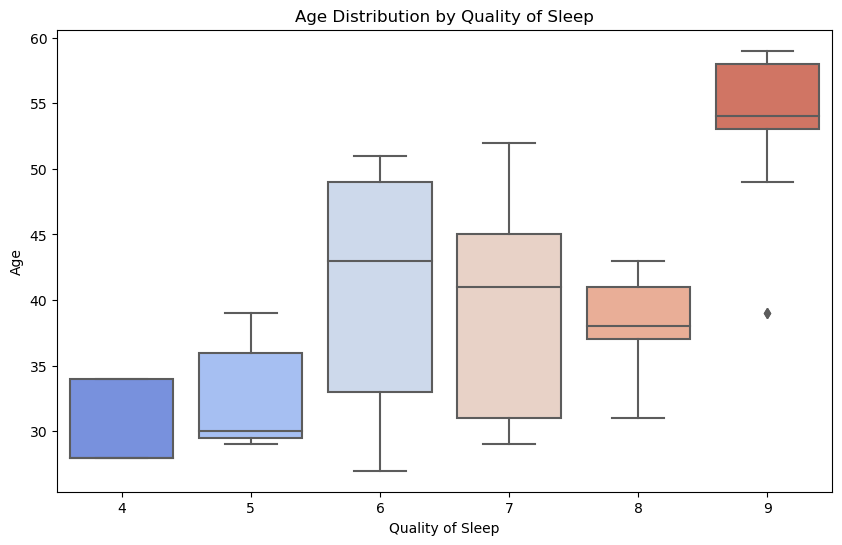

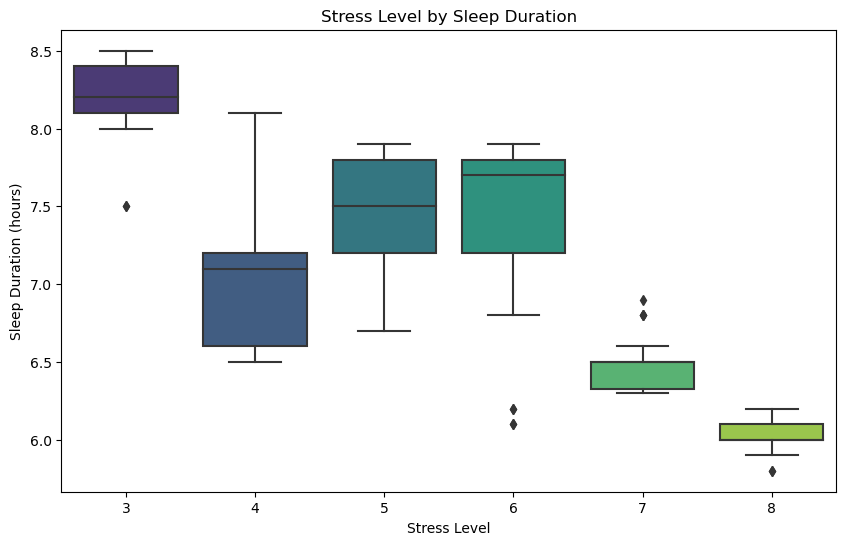

C:\Users\anany\AppData\Local\Temp\ipykernel_11228\2023454919.py:102: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


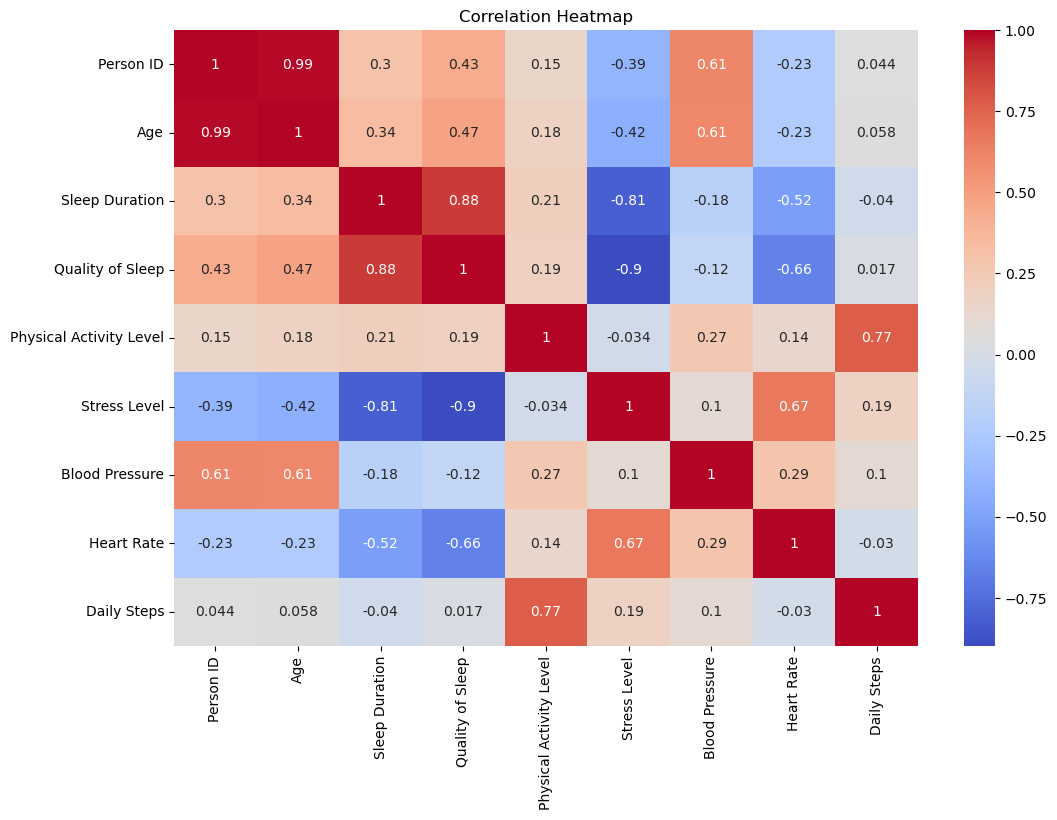

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Change the file path accordingly or keep the dataset in the same directory as your Jupyter notebook
data = pd.read_excel("C:\\Users\\anany\\Downloads\\DOE\\Sleep_health_and_lifestyle_dataset.xlsx")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Data Cleaning
# Handle missing values by filling with median for numerical columns or mode for categorical columns

# Convert 'Blood Pressure' to a numerical format, extracting only the systolic value (e.g., from '126/83', extract 126)
data['Blood Pressure'] = data['Blood Pressure'].str.split('/').str[0].astype(float, errors='ignore')

# Fill missing numerical columns with median values
for col in ['Age', 'Sleep Duration', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)

# Fill missing categorical columns with mode
for col in ['Gender', 'Occupation', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Sleep Disorder']:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Display missing values after filling
print("\nMissing values after data cleaning:")
print(data.isnull().sum())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Exploratory Data Analysis (EDA)
# Visualize the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(data['Sleep Duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Count plot of Quality of Sleep
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality of Sleep', data=data, palette='viridis')
plt.title('Count of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

# Count plot of Stress Level
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress Level', data=data, palette='Set2')
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# Count plot of Physical Activity Level by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Physical Activity Level', hue='Gender', data=data, palette='husl')
plt.title('Physical Activity Level by Gender')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# Boxplot of Age by Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Age', data=data, palette='coolwarm')
plt.title('Age Distribution by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Age')
plt.show()

# Boxplot of Stress Level by Sleep Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data, palette='viridis')
plt.title('Stress Level by Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Save the cleaned dataset (optional)
# Uncomment the following line to save the cleaned data to a new Excel file
# data.to_excel("Cleaned_Sleep_health_and_lifestyle_dataset.xlsx", index=False)
